# Proyek Analisis Data:
- Nama: Muhammad Wildanu Staifen
- Email: mws02505@gmail.com
- Id Dicoding: Muhammad Wildanu Staifen

## Menentukan Pertanyaan Bisnis

- pertanyaan 1
  Apakah terdapat perubahan signifikan dalam kualitas udara dari tahun ke tahun?
- pertanyaan 2
  Bagaimana tingkat polusi udara pada jam-jam tertentu sepanjang hari?

## Menyiapkan semua library yang dibuthkan

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

Tabel data stasiun dongsi

In [131]:
Dongsi_df = pd.read_csv("https://raw.githubusercontent.com/Danu313/analisis_data/main/PRSA_Data/Dongsi.csv")
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


Tabel data stasiun Aotizhongxin

In [132]:
Aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/Danu313/analisis_data/main/PRSA_Data/Aotizhongxin.csv")
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


###Assessing Data

Menilai tabel **Dongsi_df**

In [133]:
Dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [134]:
Dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [135]:
print("Jumlah duplikasi Stasiun Dongsi: ", Dongsi_df.duplicated().sum())

Jumlah duplikasi Stasiun Dongsi:  0


In [136]:
Dongsi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Menilai data Aotizhongxin

In [137]:
Aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [138]:
Aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [139]:
print("Jumlah duplikasi Stasiun Aotizhongxin: ", Aotizhongxin_df.duplicated().sum())

Jumlah duplikasi Stasiun Aotizhongxin:  0


Menampilkan ringkasan parameter statistik Aotizhongxin

In [140]:
Aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Cleaning Data

####Membersihkan tabel Dongsi_df

**Duplikasi Data**

In [141]:
Dongsi_df.duplicated().sum()

0

In [142]:
Dongsi_df = Dongsi_df.ffill()

In [143]:
Dongsi_df_interpolated_poly = Dongsi_df.interpolate(method='polynomial', order=2)


**Memeriksa missing values**

In [144]:
Dongsi_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [145]:
Dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,3.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,300.0,60.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,18.0,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


####Membersihkan tabel Aotizongxin

**Duplikasi data**

In [146]:
Aotizhongxin_df.duplicated().sum()

0

In [147]:
Aotizhongxin_df = Aotizhongxin_df.ffill()

In [148]:
Aotizhongxin_df_interpolated_poly = Aotizhongxin_df.interpolate(method='polynomial', order=2)

**Memeriksa Missing Values**

In [149]:
Aotizhongxin_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [150]:
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## Exploratory Data Analysis (EDA)

### Explore Dongsi_df

**Mengambil acak 10 baris dataframe**

In [151]:
Dongsi_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16643,16644,2015,1,23,11,209.0,209.0,68.0,96.0,2900.0,10.0,0.000000,1013.0,-11.1,0.0,SE,1.1,Dongsi
15818,15819,2014,12,20,2,3.0,12.0,12.0,27.0,600.0,25.0,-4.000000,1024.0,-18.3,0.0,NW,1.7,Dongsi
22745,22746,2015,10,4,17,175.0,215.0,30.0,43.0,1100.0,194.0,23.700000,1016.1,10.7,0.0,SSW,1.6,Dongsi
25536,25537,2016,1,29,0,115.0,126.0,37.0,72.0,2600.0,5.0,-3.600000,1029.6,-13.6,0.0,SSE,1.1,Dongsi
34260,34261,2017,1,26,12,3.0,5.0,63.0,94.0,1400.0,31.0,-0.066667,1016.0,-7.0,0.0,NE,1.5,Dongsi
9341,9342,2014,3,25,5,265.0,292.0,45.0,109.0,2100.0,21.0,8.000000,1007.2,2.7,0.0,NNE,0.6,Dongsi
17976,17977,2015,3,20,0,116.0,453.0,16.0,114.0,1500.0,6.0,11.500000,1013.8,-6.4,0.0,NW,1.5,Dongsi
407,408,2013,3,17,23,509.0,452.0,66.0,212.0,2100.0,107.0,7.900000,997.8,4.5,0.0,N,1.0,Dongsi
16503,16504,2015,1,17,15,88.0,93.0,49.0,43.0,1200.0,51.0,2.000000,1028.0,-15.5,0.0,SW,2.5,Dongsi
16652,16653,2015,1,23,20,276.0,276.0,76.0,144.0,4300.0,2.0,-1.000000,1014.0,-9.1,0.0,NW,0.8,Dongsi


**Melihat statistik deskriptif**

In [152]:
Dongsi_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3867,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.310293,110.584283,18.527338,52.194294,1363.244439,57.525669,13.668746,1012.551858,2.445117,0.063983,NaN,1.860712,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.337389,98.181732,22.974084,34.475533,1201.231679,58.674161,11.460066,10.266719,13.812242,0.786059,NaN,1.280429,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.427200,26.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,87.000000,10.000000,46.000000,1000.000000,44.553600,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,120.000000,151.000000,24.000000,72.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


**Melihat distribusi nilai CO**

<Axes: >

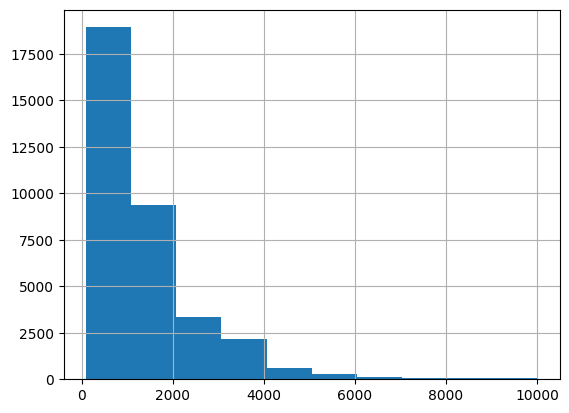

In [153]:
Dongsi_df['CO'].hist()


**statistik desktiptif**

array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

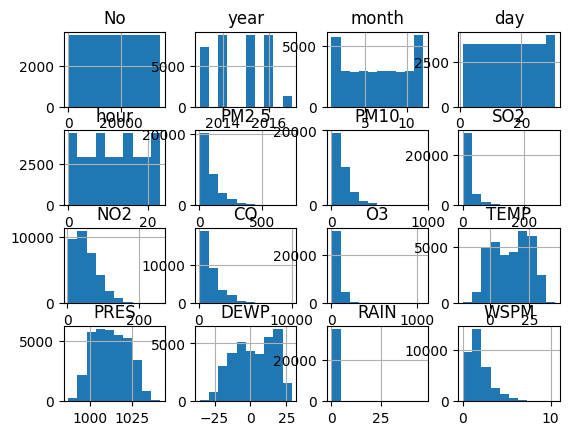

In [154]:
Dongsi_df.hist()

**pengelompokan**

In [155]:
Dongsi_df.groupby('CO').agg({
    'TEMP': ['mean', 'std'],
    'PRES': 'max'
})


TEMP               PRES
              mean        std     max
CO                                   
100.0    11.560833  11.112799  1036.0
200.0    12.354416  10.432837  1038.2
300.0    12.136157  11.578181  1040.9
400.0    12.110196  11.847295  1042.0
500.0    14.291865  11.727854  1041.2
...            ...        ...     ...
9500.0   -2.646154   1.737151  1021.2
9600.0   -1.600000        NaN  1019.5
9800.0   -0.300000        NaN  1026.2
9900.0    0.050000   0.264575  1026.0
10000.0  16.450000   5.782973  1015.3

[115 rows x 3 columns]

### Explore Aotizhongxin

**Mengambil acak 10 baris dataframe**

In [156]:
Aotizhongxin_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
23280,23281,2015,10,27,0,8.0,22.0,2.0,22.0,300.0,54.0,11.3,1014.3,-8.6,0.0,WNW,2.3,Aotizhongxin
20266,20267,2015,6,23,10,285.0,285.0,28.0,70.0,2600.0,105.0,25.5,1003.9,18.4,0.0,ENE,1.4,Aotizhongxin
4777,4778,2013,9,16,1,29.0,70.0,13.0,67.0,800.0,8.0,17.1,1007.0,15.4,0.0,S,0.6,Aotizhongxin
4992,4993,2013,9,25,0,15.0,30.0,3.0,66.0,300.0,1.0,9.2,1017.1,3.4,0.0,SW,0.4,Aotizhongxin
18377,18378,2015,4,5,17,18.0,50.0,2.0,11.0,300.0,90.0,14.5,1014.8,-8.9,0.0,NW,6.6,Aotizhongxin
7138,7139,2013,12,23,10,176.0,262.0,115.0,122.0,5600.0,1.0,1.6,1026.5,-10.9,0.0,WSW,1.3,Aotizhongxin
5282,5283,2013,10,7,2,161.0,169.0,50.0,78.0,2200.0,4.0,14.5,1015.3,14.3,0.0,NE,1.1,Aotizhongxin
3009,3010,2013,7,4,9,21.0,52.0,5.0,53.0,400.0,43.0,31.8,988.6,19.1,0.0,NNE,1.6,Aotizhongxin
27606,27607,2016,4,24,6,47.0,103.0,10.0,52.0,900.0,2.0,6.8,1009.3,-0.2,0.0,E,0.7,Aotizhongxin
24627,24628,2015,12,22,3,298.0,298.0,35.0,110.0,6100.0,14.0,-3.5,1024.9,-4.9,0.0,SE,0.5,Aotizhongxin


**Melihat statistik deskriptif**

In [157]:
Aotizhongxin_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5161,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.163652,110.733262,17.573220,59.290826,1267.071954,55.184512,13.581908,1011.851716,3.120283,0.067383,NaN,1.708470,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.290700,95.375762,22.819302,37.007696,1242.121599,57.582259,11.400761,10.404909,13.690615,0.909798,NaN,1.204171,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,88.000000,9.000000,54.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,157.000000,22.000000,81.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


**Melihat distribusi nilai CO**

<Axes: >

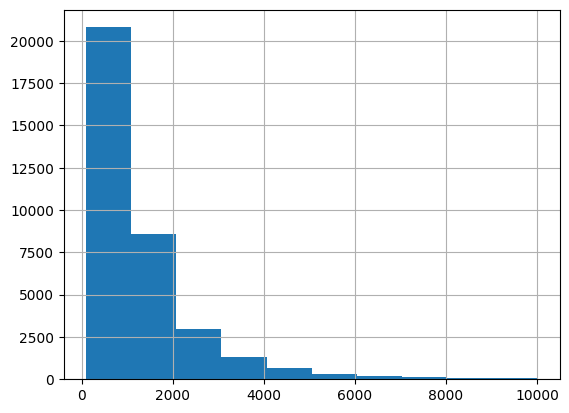

In [158]:
Aotizhongxin_df['CO'].hist()


**statistik desktiptif**

array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

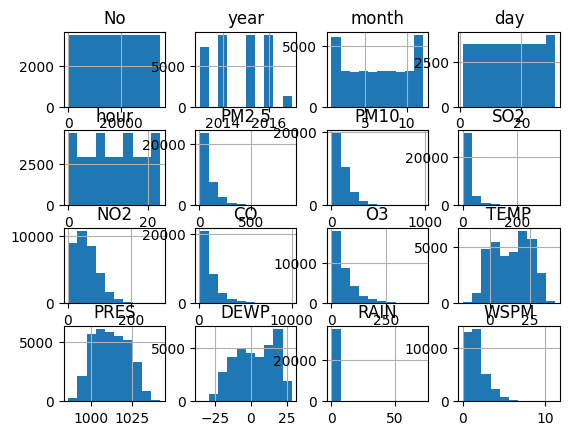

In [159]:
Aotizhongxin_df.hist()

**pengelompokan**

In [160]:
Aotizhongxin_df.groupby('CO').agg({
    'TEMP': ['mean', 'std'],
    'PRES': 'max'
})


TEMP               PRES
              mean        std     max
CO                                   
100.0    17.628835  12.301445  1035.4
200.0    19.603214   9.499143  1036.4
300.0    16.387371  10.439611  1037.2
400.0    13.961810  11.332658  1036.6
500.0    15.114478  11.287840  1040.9
...            ...        ...     ...
9500.0   -1.700000   2.437212  1024.3
9600.0   -1.278947   1.187237  1023.9
9700.0   -3.025000   1.590335  1025.8
9900.0   -2.785714   1.673254  1022.2
10000.0  -2.254545   1.457644  1026.2

[112 rows x 3 columns]

## Visualization & Explanatory Analysis

**Pola dan distribusi temperature dan CO Dongsi_df**

<Axes: xlabel='TEMP', ylabel='CO'>

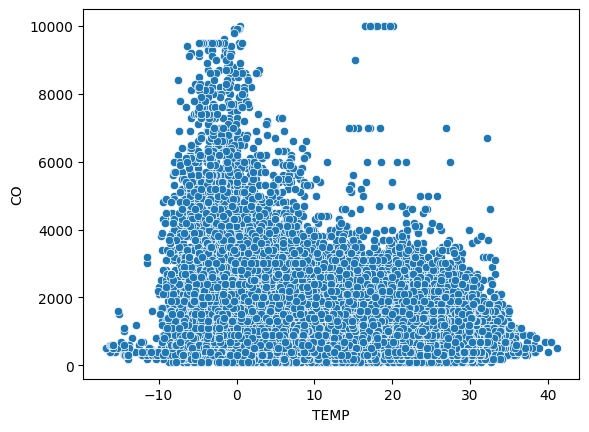

In [161]:
sns.scatterplot(x='TEMP', y='CO', data=Dongsi_df)

**Pola dan distribusi temperature dan CO Aotizhongxin_df**

<Axes: xlabel='TEMP', ylabel='CO'>

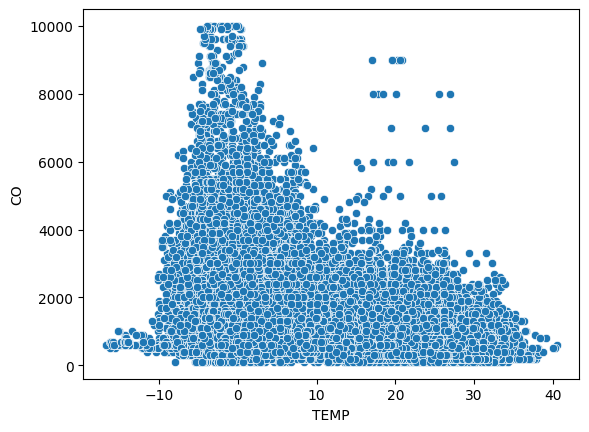

In [162]:
sns.scatterplot(x='TEMP', y='CO', data=Aotizhongxin_df)

### Pertanyaan 1: Apakah terdapat perubahan signifikan dalam kualitas udara dari tahun ke tahun?

####Kualitas udara pada data Dongsi_df

**Menghitung rata-rata kualitas udara per tahun**

In [163]:
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
yearly_avg = Dongsi_df.groupby('year').agg({col: 'mean' for col in numeric_columns})

**menampilkan rata rata kualitas udara setiap tahun**

In [164]:
print(yearly_avg)

           PM2.5        PM10        SO2        NO2           CO         O3  \
year                                                                         
2013   86.864243  105.070534  23.758032  57.275206  1463.957380  64.902120   
2014   88.239749  117.659521  24.241142  50.159018  1383.881279  56.878630   
2015   87.046450  112.134349  15.213265  50.374612  1339.954338  55.731975   
2016   80.580943  103.155055  11.459358  50.860883  1238.376594  56.659608   
2017  102.487994  131.907486  20.398305  57.962571  1631.920904  39.740113   

           TEMP         PRES       DEWP      RAIN      WSPM  
year                                                         
2013  15.963657  1009.828758   5.152369  0.057979  1.803813  
2014  13.881153  1012.534224   2.604429  0.054212  1.820046  
2015  13.428694  1012.792924   2.687785  0.072865  1.934532  
2016  13.873747  1012.821671   2.300467  0.079702  1.859028  
2017   0.665657  1023.619056 -13.185381  0.003107  1.961158  


**Visualisasi perubahan kualitas udara dari tahun ke tahun**

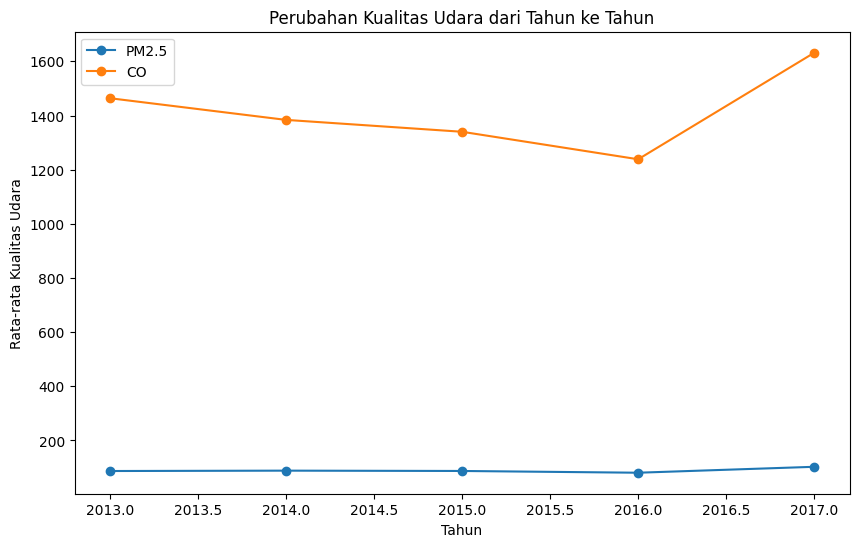

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg['PM2.5'], marker='o', label='PM2.5')
plt.plot(yearly_avg.index, yearly_avg['CO'], marker='o', label='CO')
# Tambahkan plot untuk variabel lain jika diperlukan

plt.xlabel('Tahun')
plt.ylabel('Rata-rata Kualitas Udara')
plt.title('Perubahan Kualitas Udara dari Tahun ke Tahun')
plt.legend()
plt.show()


**rata rata suhu setiap tahun**

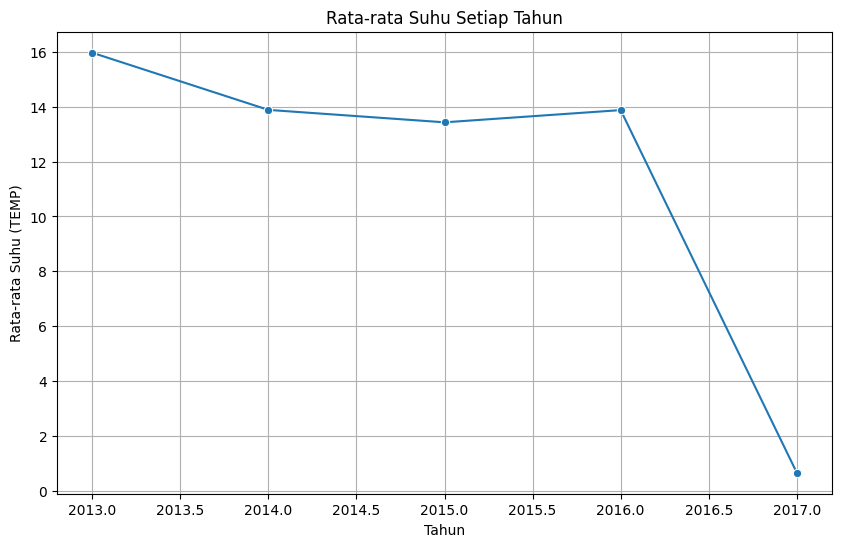

In [166]:
numeric_columns = ['TEMP']
yearly_avg_temp = Dongsi_df.groupby('year')[numeric_columns].mean().reset_index()

# Visualisasi rata-rata suhu setiap tahun dengan Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_temp, x='year', y='TEMP', marker='o')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Suhu (TEMP)')
plt.title('Rata-rata Suhu Setiap Tahun')
plt.grid(True)
plt.show()

####Kualitas udara pada data Aotizhongxin_df

**Menghitung rata-rata kualitas udara per tahun**

In [167]:
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
yearly_avg = Aotizhongxin_df.groupby('year').agg({col: 'mean' for col in numeric_columns})

**menampilkan rata rata kualitas udara setiap tahun**

In [168]:
print(yearly_avg)

          PM2.5        PM10        SO2        NO2           CO         O3  \
year                                                                        
2013  82.494145  112.935458  23.570135  63.383651  1139.012936  47.004686   
2014  91.413413  124.382226  21.975285  64.063002  1215.445205  48.112591   
2015  82.075548  112.158425  14.363904  60.968961  1438.047945  63.521689   
2016  74.773224   94.463001  10.844945  48.325364  1190.926685  62.016507   
2017  94.379944  106.987288  20.829802  66.182203  1665.254237  47.399718   

           TEMP         PRES       DEWP      RAIN      WSPM  
year                                                         
2013  15.497740  1008.200408   6.465400  0.071582  1.532993  
2014  13.878128  1011.318082   4.162203  0.056610  1.476895  
2015  13.474733  1012.571714   2.731735  0.072671  1.895342  
2016  13.873747  1012.821671   2.300467  0.079702  1.859028  
2017   0.665657  1023.619056 -13.185381  0.003107  1.961158  


**Visualisasi perubahan kualitas udara dari tahun ke tahun**

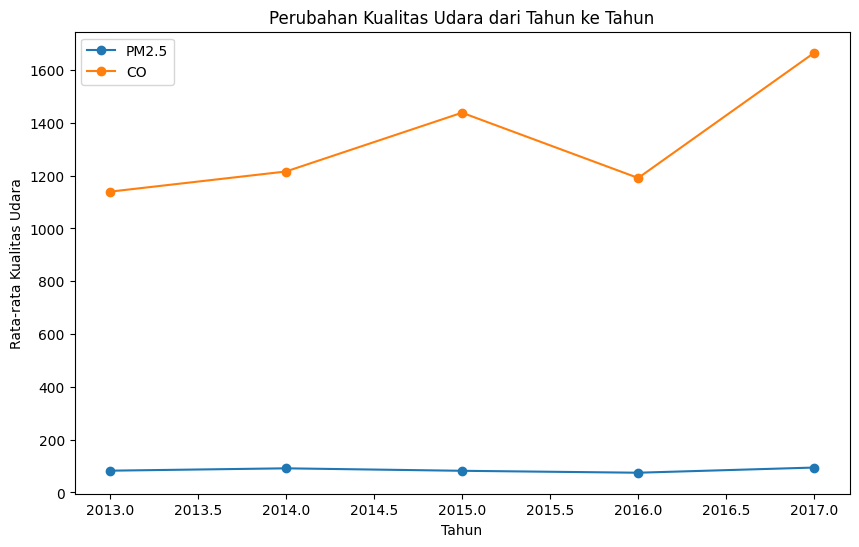

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg['PM2.5'], marker='o', label='PM2.5')
plt.plot(yearly_avg.index, yearly_avg['CO'], marker='o', label='CO')
# Tambahkan plot untuk variabel lain jika diperlukan

plt.xlabel('Tahun')
plt.ylabel('Rata-rata Kualitas Udara')
plt.title('Perubahan Kualitas Udara dari Tahun ke Tahun')
plt.legend()
plt.show()


**rata rata suhu setiap tahun**

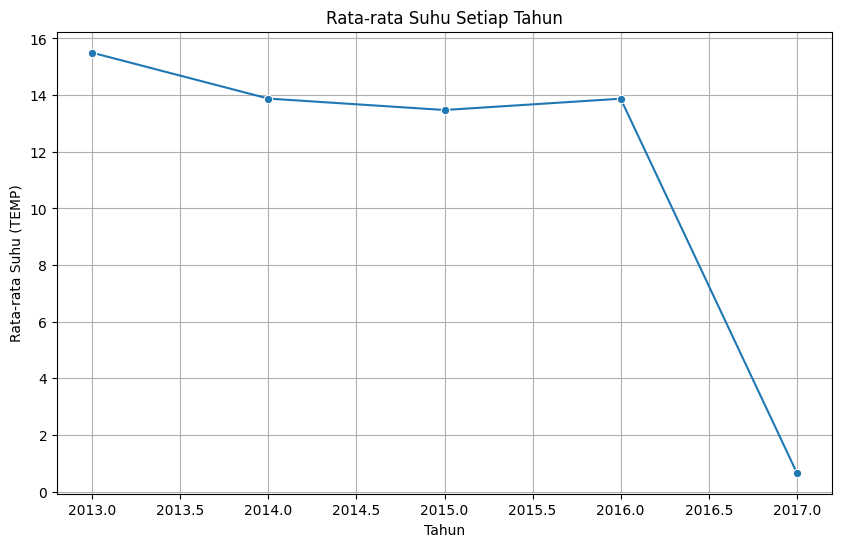

In [170]:
numeric_columns = ['TEMP']
yearly_avg_temp = Aotizhongxin_df.groupby('year')[numeric_columns].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_temp, x='year', y='TEMP', marker='o')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Suhu (TEMP)')
plt.title('Rata-rata Suhu Setiap Tahun')
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana tingkat polusi udara pada jam-jam tertentu sepanjang hari?

####Tingkat polusi pada data Dongsi_df

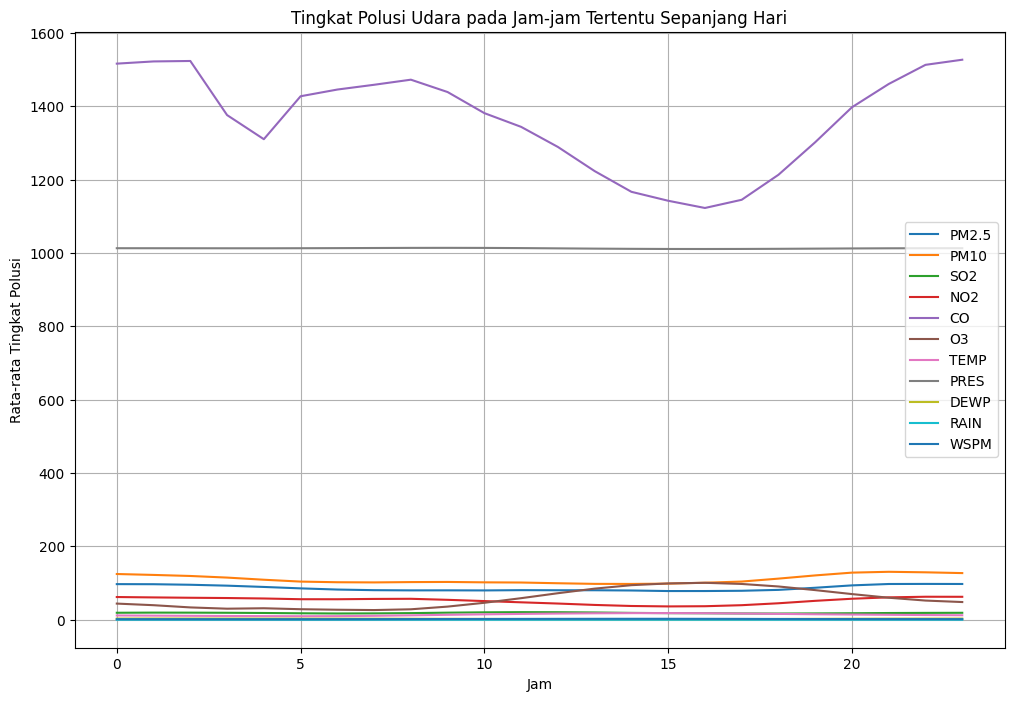

In [171]:
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
categorical_column = 'hour'

hourly_avg_pollution = Dongsi_df.groupby(categorical_column)[numeric_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
for column in numeric_columns:
    sns.lineplot(data=hourly_avg_pollution, x=categorical_column, y=column, label=column)

plt.xlabel('Jam')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.title('Tingkat Polusi Udara pada Jam-jam Tertentu Sepanjang Hari')
plt.legend()
plt.grid(True)
plt.show()

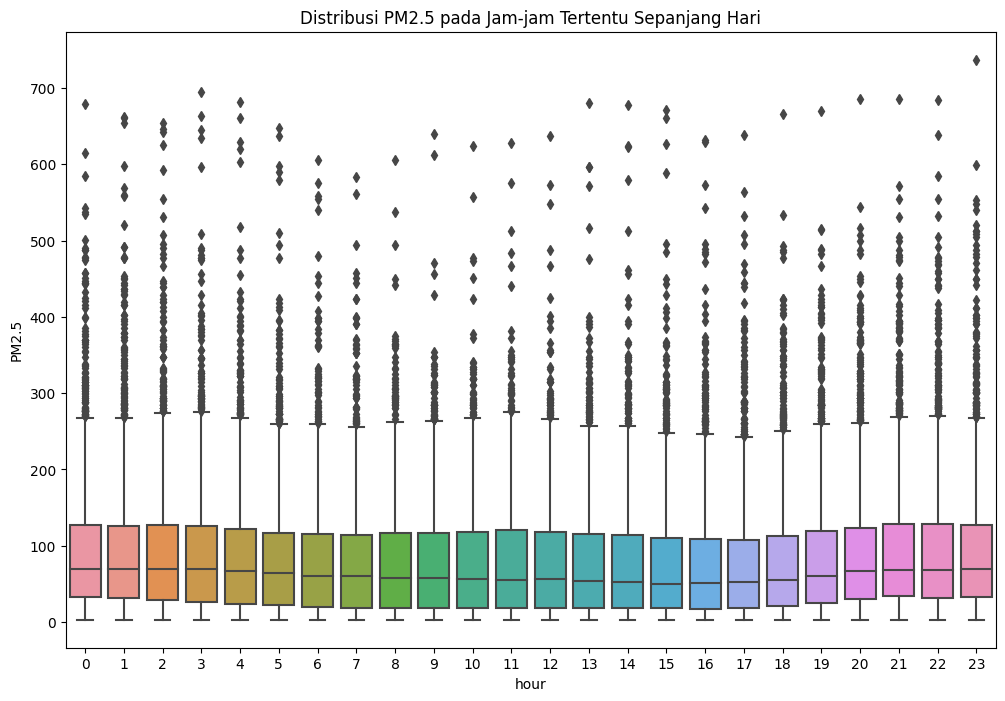

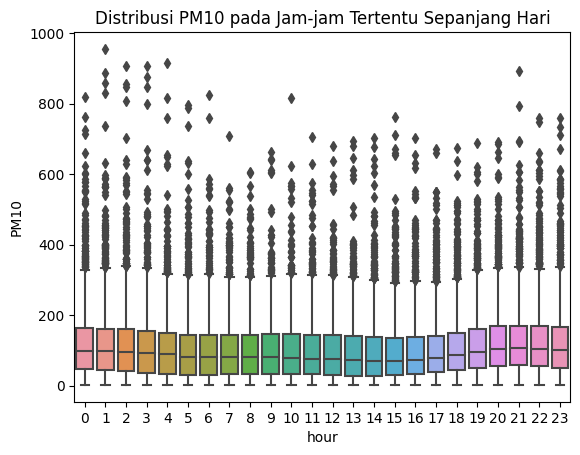

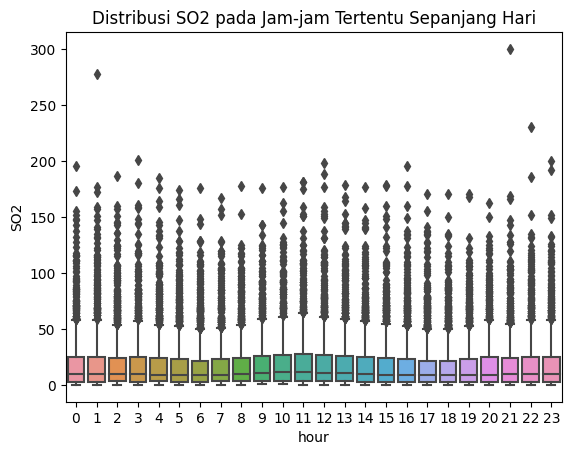

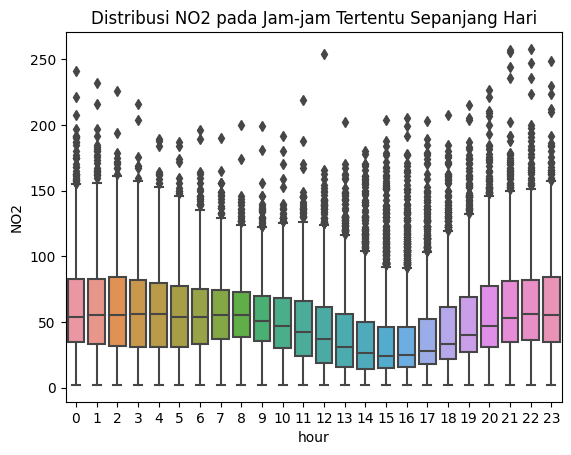

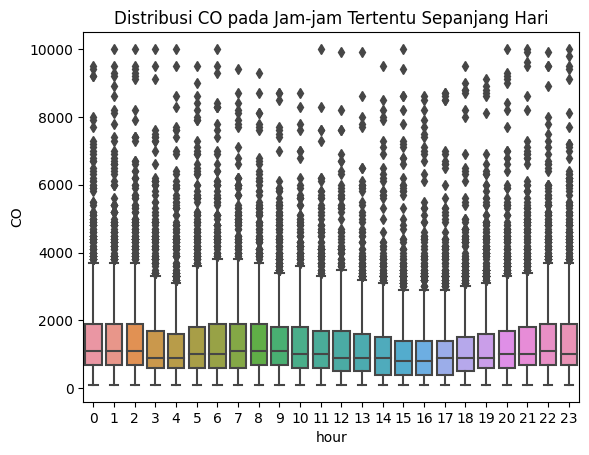

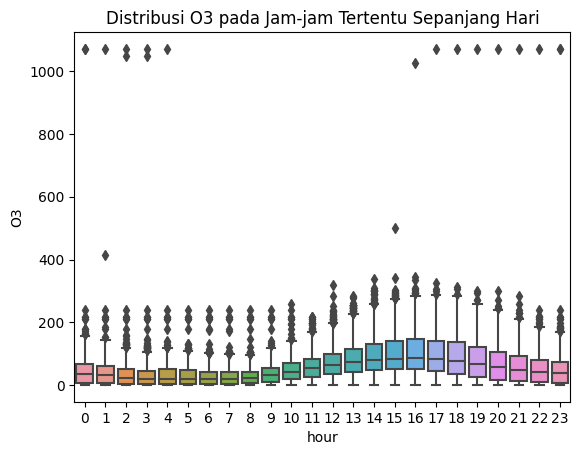

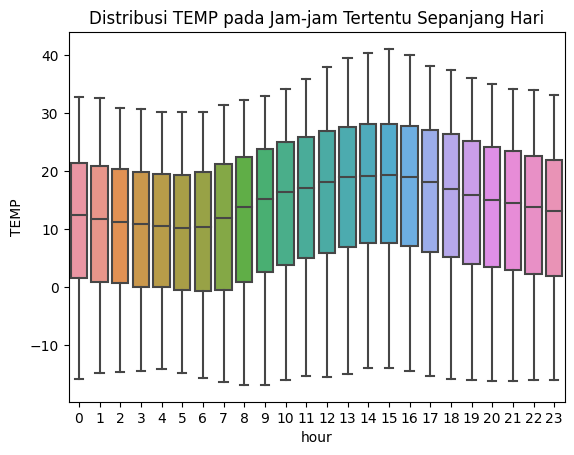

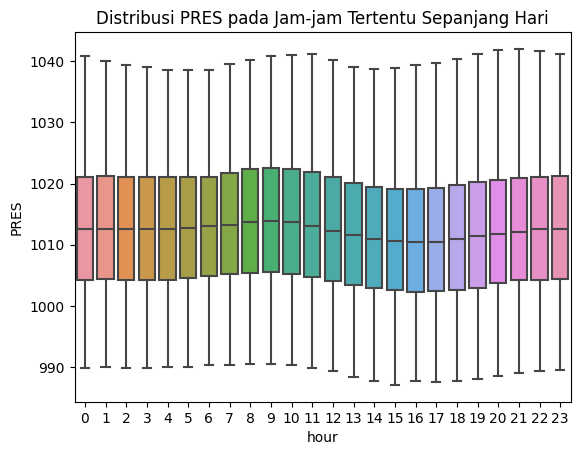

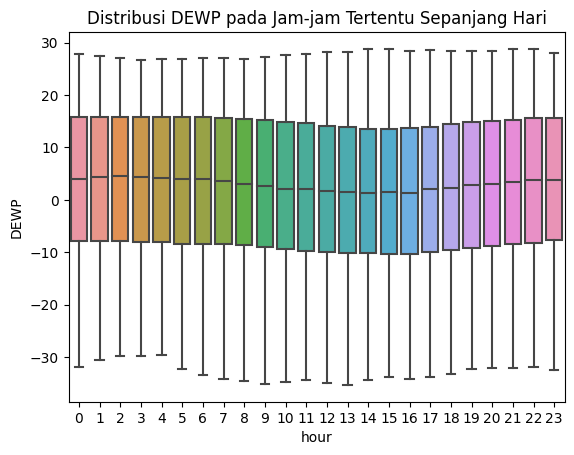

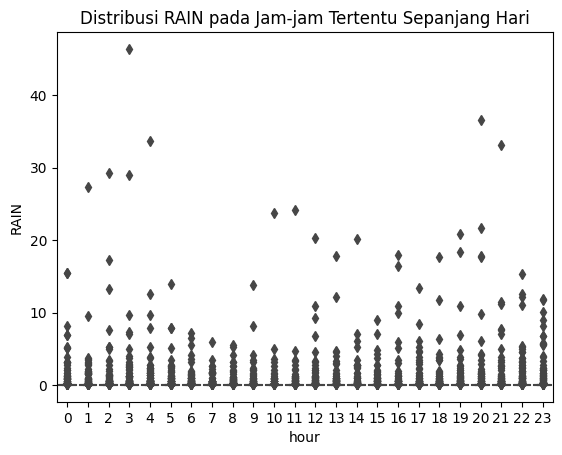

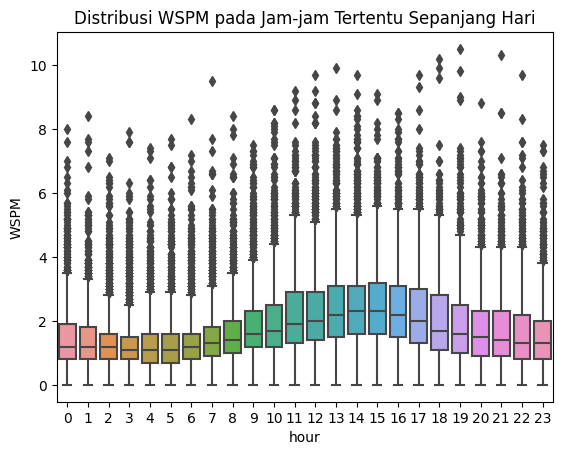

In [172]:
plt.figure(figsize=(12, 8))
for column in numeric_columns:
    sns.boxplot(data=Dongsi_df, x='hour', y=column)
    plt.title(f'Distribusi {column} pada Jam-jam Tertentu Sepanjang Hari')
    plt.show()


####Tingkat polusi pada data Aotizhongxin

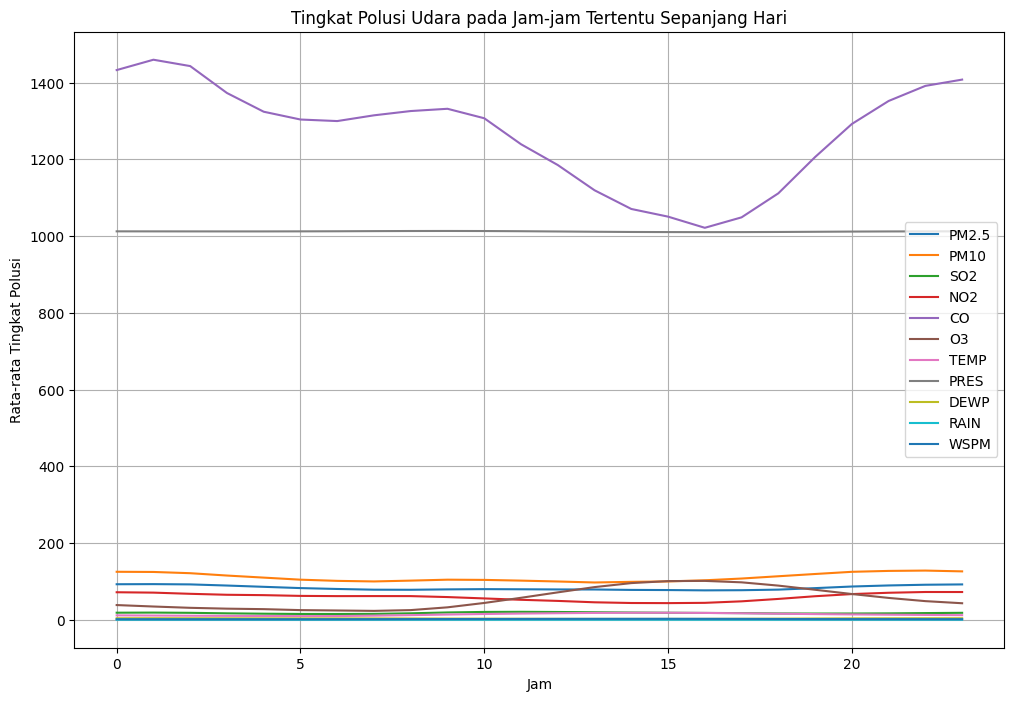

In [173]:
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
categorical_column = 'hour'

hourly_avg_pollution = Aotizhongxin_df.groupby(categorical_column)[numeric_columns].mean().reset_index()

plt.figure(figsize=(12, 8))
for column in numeric_columns:
    sns.lineplot(data=hourly_avg_pollution, x=categorical_column, y=column, label=column)

plt.xlabel('Jam')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.title('Tingkat Polusi Udara pada Jam-jam Tertentu Sepanjang Hari')
plt.legend()
plt.grid(True)
plt.show()

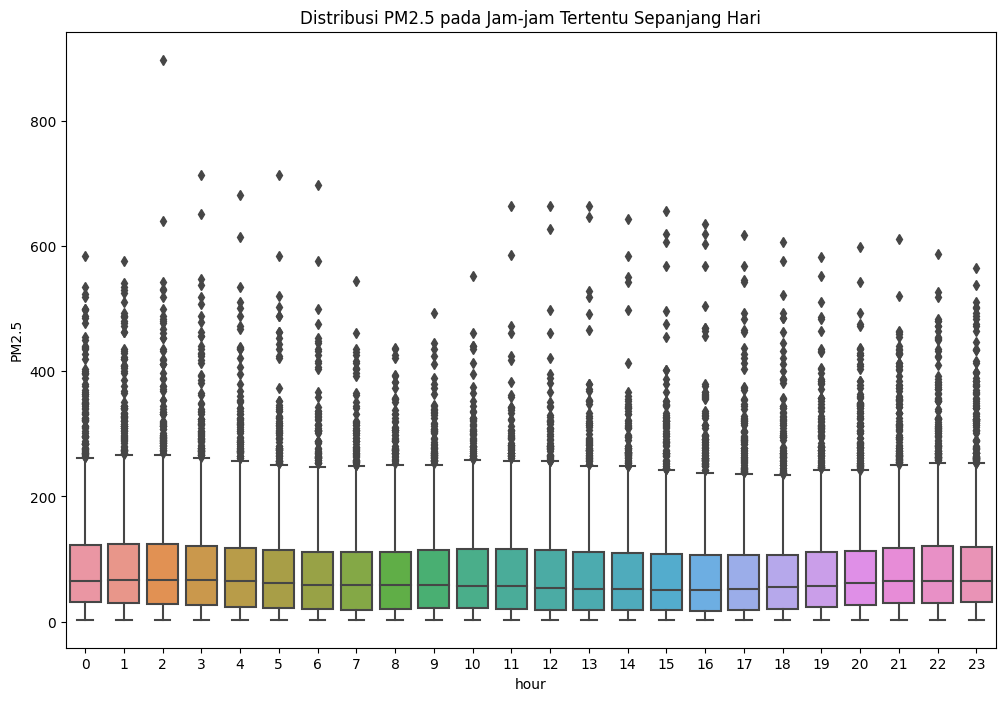

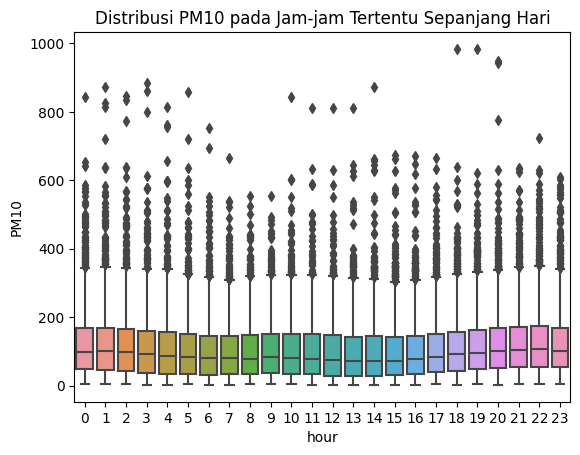

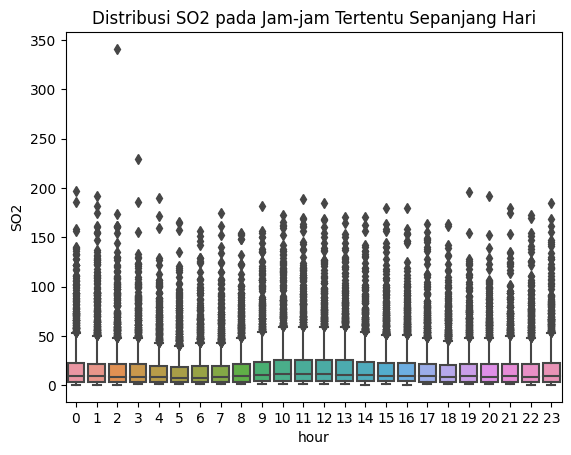

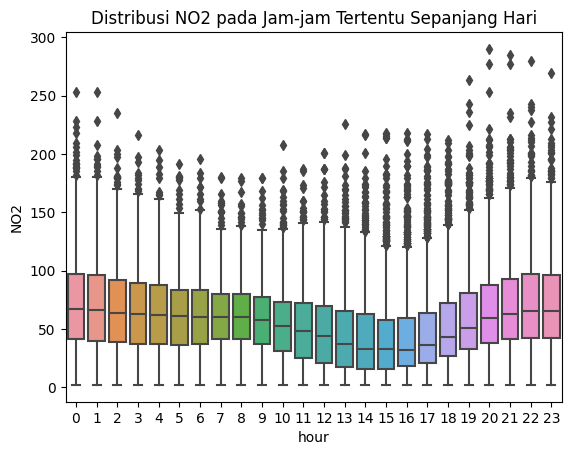

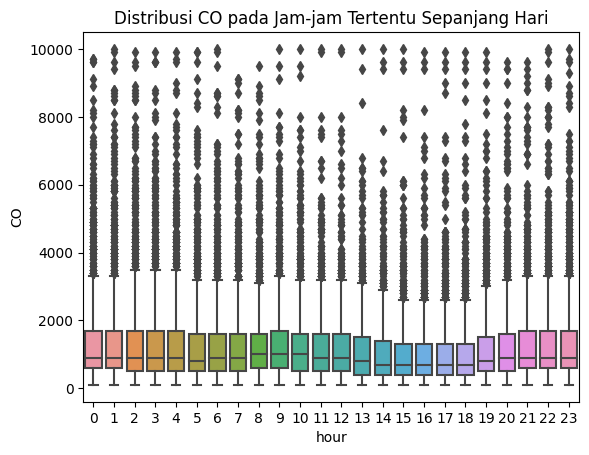

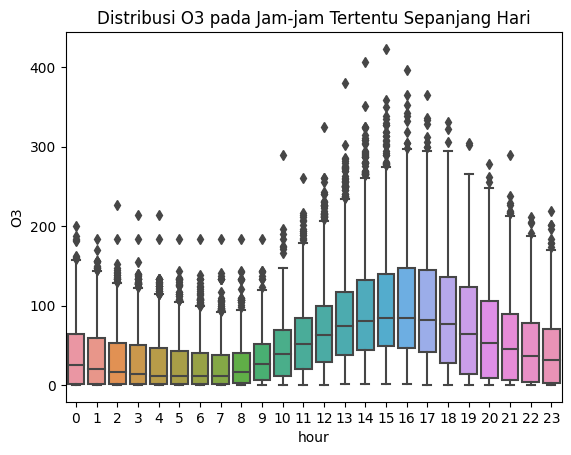

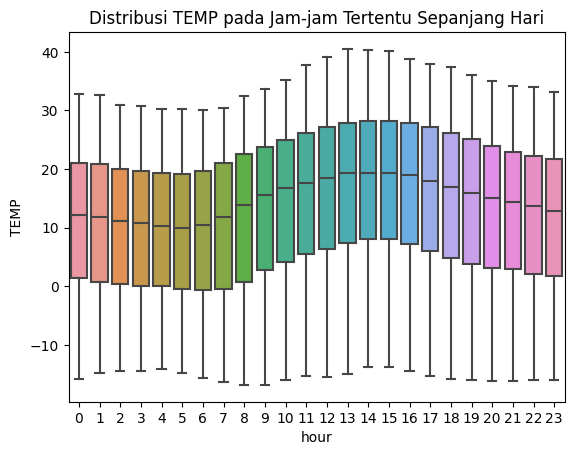

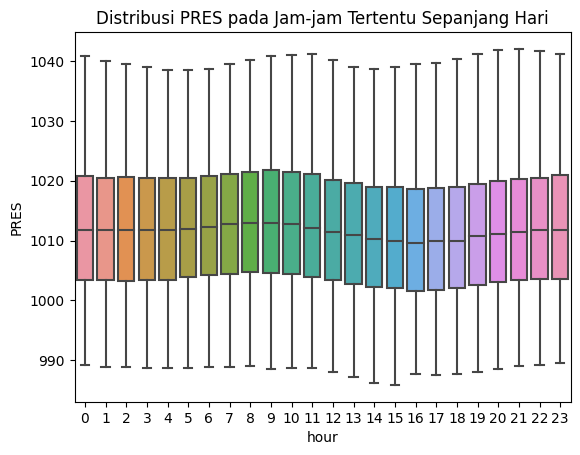

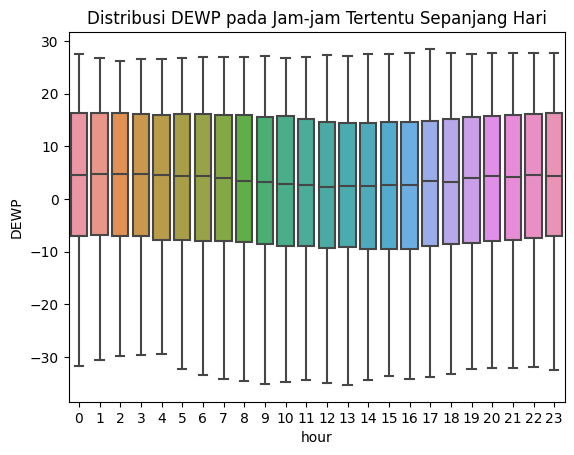

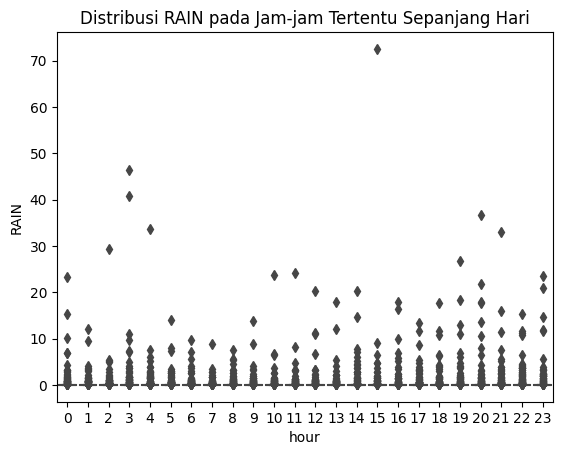

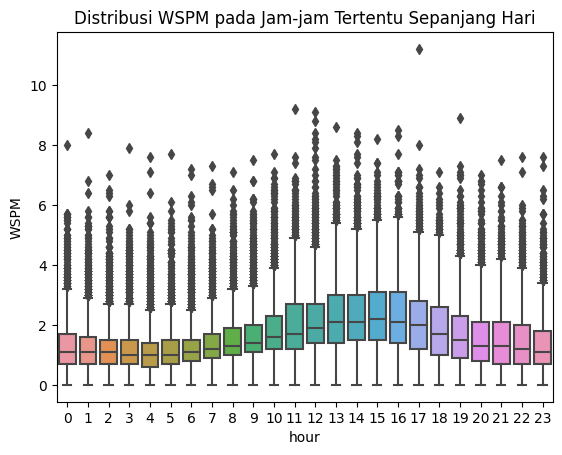

In [174]:
plt.figure(figsize=(12, 8))
for column in numeric_columns:
    sns.boxplot(data=Aotizhongxin_df, x='hour', y=column)
    plt.title(f'Distribusi {column} pada Jam-jam Tertentu Sepanjang Hari')
    plt.show()

## Conclusion

- Conclution pertanyaan 1
Analisis: Menggunakan visualisasi rata-rata kualitas udara setiap tahun, dapat dilihat apakah ada tren peningkatan atau penurunan dalam beberapa parameter seperti PM2.5, CO, dan lainnya.
Kesimpulan: Tren perubahan kualitas udara dapat diamati dari visualisasi, dan analisis statistik mungkin diperlukan untuk mengkonfirmasi apakah perubahan tersebut signifikan.



- conclution pertanyaan 2
Analisis: Dengan menggunakan grafik garis atau box plot, dapat diamati bagaimana tingkat polusi udara bervariasi selama setiap jam dalam sehari untuk berbagai parameter seperti PM2.5, CO, dan lainnya.
Kesimpulan: Analisis ini dapat memberikan wawasan tentang pola harian tingkat polusi udara, termasuk puncak atau fluktuasi selama beberapa jam tertentu.

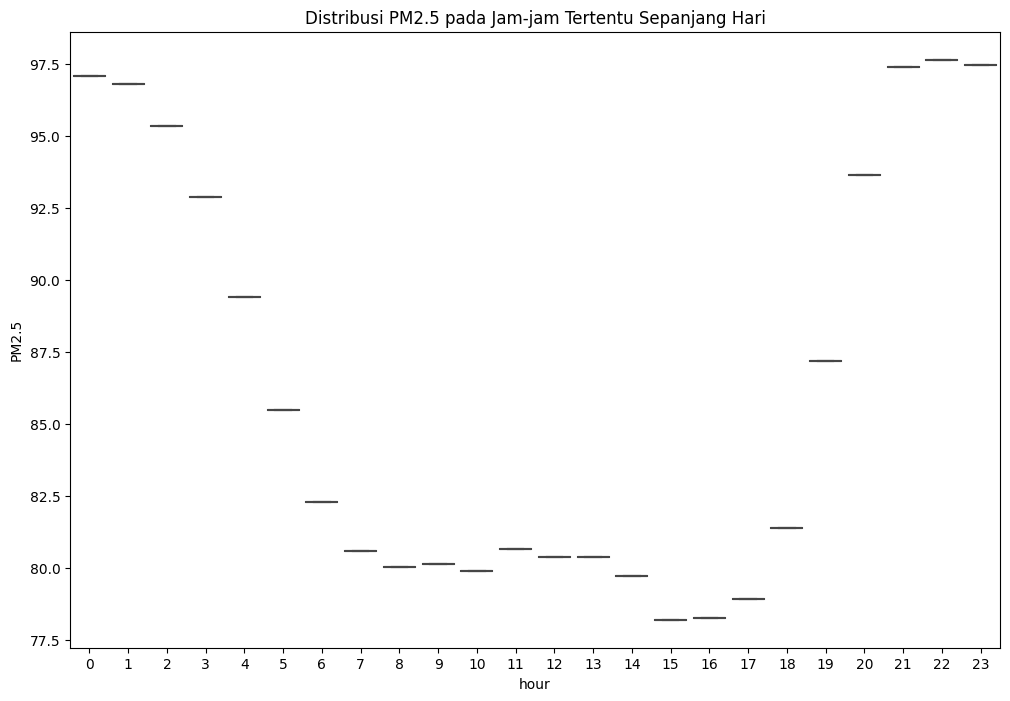

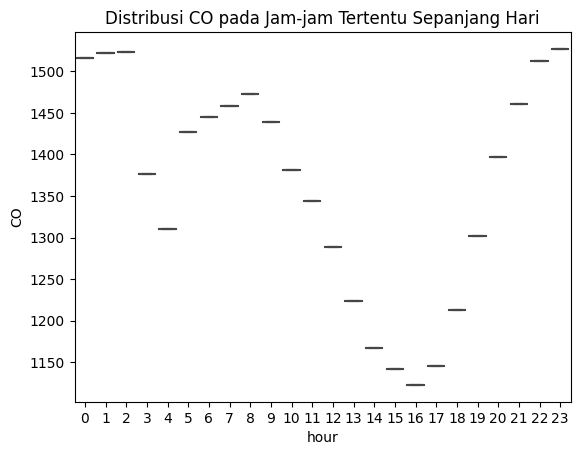

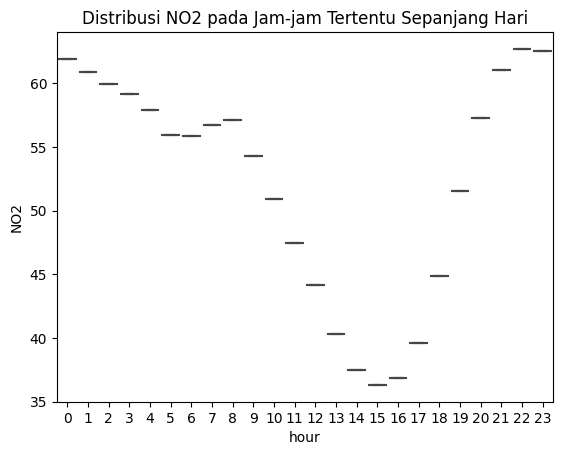

In [ ]:
plt.figure(figsize=(12, 8))
for column in ['PM2.5', 'CO', 'NO2']:
    sns.boxplot(data=hourly_avg_pollution, x='hour', y=column)
    plt.title(f'Distribusi {column} pada Jam-jam Tertentu Sepanjang Hari')
    plt.show()
